In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import pyproj
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [2]:
#sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x))

In [3]:
prop4sale = pd.read_csv('data/clean/clean_ncr_prop4sale.csv',index_col=0)
prop4rent = pd.read_csv('data/clean/clean_ncr_prop4rent.csv',index_col=0)
jobs = pd.read_csv('data/clean/clean_ncr_jobs.csv',index_col=0)
schools = pd.read_csv('data/clean/clean_ncr_school.csv',index_col=0)
ph_geodata = gpd.read_file('data/ph-adm/PHL_adm2.shp')

dataset_list = [prop4sale, 
                prop4rent, 
                jobs, 
                schools]
name_list = ['prop4sale', 
             'prop4rent', 
             'jobs', 
             'schools']

In [4]:
prop4sale.listing.unique()

array(['1 bedroom condo unit for sale near dlsu|manila|the grand towers by moldex realty',
       'studio w/ balcony for sale | c. m. recto ave, manila | vista recto by vista land',
       'rfo studio condo unit beside dlsu taft|taft ave., manila| property for sale ph',
       ...,
       'for sale condotel investment at seville residences, bagumbayan, quezon city',
       'for sale: 1br unit in vinia residences, quezon city',
       'for sale 1 bedroom ready for occupancy condo in celandine place quezon city'],
      dtype=object)

In [5]:
for name, dataset in zip(name_list, dataset_list):
    print(f'\n====={name.upper()}=====')
    dataset.info()


=====PROP4SALE=====
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11023 entries, 0 to 11022
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing       11023 non-null  object 
 1   location      11023 non-null  object 
 2   price         11023 non-null  float64
 3   bedroom_num   11023 non-null  float64
 4   bathroom_num  11023 non-null  float64
 5   floor_area    11023 non-null  float64
 6   longitude     11023 non-null  float64
 7   latitude      11023 non-null  float64
 8   city          11023 non-null  object 
dtypes: float64(6), object(3)
memory usage: 861.2+ KB

=====PROP4RENT=====
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8976 entries, 0 to 8975
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   listing       8976 non-null   object 
 1   location      8976 non-null   object 
 2   price         8976 non-null   float64
 3

In [6]:
prop4sale.describe().drop(columns=['longitude', 'latitude'])

price  bedroom_num  bathroom_num  floor_area
count     11,023.000   11,023.000    11,023.000  11,023.000
mean  10,029,875.422        1.495         1.344      53.680
std    7,383,207.827        0.639         0.580      29.412
min    1,000,000.000        1.000         1.000      12.000
25%    4,722,500.000        1.000         1.000      30.000
50%    7,300,000.000        1.000         1.000      46.000
75%   13,000,000.000        2.000         2.000      69.000
max   35,100,000.000        3.000         3.000     166.000

In [7]:
prop4rent.describe().drop(columns=['longitude', 'latitude'])

price  bedroom_num  bathroom_num  floor_area
count   8,976.000    8,976.000     8,976.000   8,976.000
mean   44,460.532        1.421         1.331      55.856
std    31,112.771        0.604         0.576      32.055
min       780.000        1.000         1.000       5.000
25%    22,000.000        1.000         1.000      31.000
50%    35,000.000        1.000         1.000      46.000
75%    60,000.000        2.000         2.000      72.000
max   145,000.000        3.000         3.000     165.000

In [8]:
jobs.describe()

salary
count  4,489.000
mean  24,267.196
std    8,143.792
min    3,301.000
25%   18,000.000
50%   22,500.000
75%   28,500.000
max   47,512.000

In [9]:
schools.describe().drop(columns=['school_name'])

city   sector school_subclass curricular_class
count     1783     1783            1783             1783
unique       7        3               7                6
top     quezon  private   non-sectarian        purely es
freq       810     1345            1137              901

city                                           geometry
0      kalookan  MULTIPOLYGON (((121.01953 14.68939, 121.01971 ...
1     las piñas  MULTIPOLYGON (((120.98571 14.48585, 120.98588 ...
2        makati  POLYGON ((121.02175 14.57696, 121.02316 14.576...
3       malabon  POLYGON ((120.93582 14.69482, 120.93593 14.694...
4   mandaluyong  POLYGON ((121.05737 14.60128, 121.05743 14.601...
5        manila  POLYGON ((120.97886 14.63668, 120.97897 14.636...
6      marikina  POLYGON ((121.10728 14.67131, 121.10785 14.671...
7    muntinlupa  POLYGON ((121.04676 14.46838, 121.04719 14.468...
8       navotas  POLYGON ((120.92940 14.69242, 120.93277 14.689...
9     parañaque  MULTIPOLYGON (((120.98647 14.50257, 120.98667 ...
10        pasay  POLYGON ((121.00084 14.50921, 121.00103 14.509...
11        pasig  POLYGON ((121.08372 14.62282, 121.08645 14.620...
12      pateros  POLYGON ((121.06555 14.55412, 121.06640 14.553...
13       quezon  POLYGON ((121.11408 14.75949, 121.11430 14.759...
14     san juan  POLYGON ((121.02362 14.61240, 121.02409 14.612...
15       taguig  POLYGON ((121.07886 14.54775, 121.07909 14.547...
16   valenzuela  POLYGON ((121.00739 14.74209, 121.00761 14.742...

<AxesSubplot:>

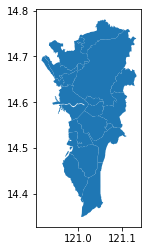

In [10]:
#  filtering geodata to consider only those in NCR
ph_geodata.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
ncr_geodata = ph_geodata.query("NAME_1 == 'Metropolitan Manila'")
ncr_geodata = ncr_geodata.rename(columns={'NAME_2': 'city'})
ncr_geodata['city'] = ncr_geodata['city'].str.replace('City of', '')
ncr_geodata['city'] = ncr_geodata['city'].str.replace('City', '')
ncr_geodata['city'] = ncr_geodata['city'].str.lower()
ncr_geodata['city'] = ncr_geodata['city'].str.strip()
ncr_geodata = ncr_geodata.drop(columns=['NAME_1'])
ncr_geodata = ncr_geodata[['city', 'geometry']] 
ncr_geodata = ncr_geodata.reset_index(drop=True)
display(ncr_geodata)
ncr_geodata.plot()

<h1>Choropleth Maps</h1>

<h2>Property for Sale</h2>

In [11]:
#  median price of property for sale in NCR
ave_prop4sale_city = prop4sale.groupby(by='city')['price'].median().reset_index()
ave_prop4sale_city = ncr_geodata.merge(ave_prop4sale_city, on='city', how='inner')
display(ave_prop4sale_city)

#  number of properties for sale in NCR
count_prop4sale_city = prop4sale.groupby(by='city')['listing'].count().reset_index()
count_prop4sale_city = ncr_geodata.merge(count_prop4sale_city, on='city', how='inner')
display(count_prop4sale_city)

city                                           geometry  \
0       makati  POLYGON ((121.02175 14.57696, 121.02316 14.576...   
1  mandaluyong  POLYGON ((121.05737 14.60128, 121.05743 14.601...   
2       manila  POLYGON ((120.97886 14.63668, 120.97897 14.636...   
3        pasig  POLYGON ((121.08372 14.62282, 121.08645 14.620...   
4       quezon  POLYGON ((121.11408 14.75949, 121.11430 14.759...   
5     san juan  POLYGON ((121.02362 14.61240, 121.02409 14.612...   
6       taguig  POLYGON ((121.07886 14.54775, 121.07909 14.547...   

           price  
0  9,500,000.000  
1  5,778,029.500  
2  4,818,178.000  
3  8,000,000.000  
4  5,400,000.000  
5  6,500,000.000  
6 13,000,000.000

city                                           geometry  listing
0       makati  POLYGON ((121.02175 14.57696, 121.02316 14.576...     2065
1  mandaluyong  POLYGON ((121.05737 14.60128, 121.05743 14.601...     1610
2       manila  POLYGON ((120.97886 14.63668, 120.97897 14.636...     1003
3        pasig  POLYGON ((121.08372 14.62282, 121.08645 14.620...     1909
4       quezon  POLYGON ((121.11408 14.75949, 121.11430 14.759...     1909
5     san juan  POLYGON ((121.02362 14.61240, 121.02409 14.612...      422
6       taguig  POLYGON ((121.07886 14.54775, 121.07909 14.547...     2105

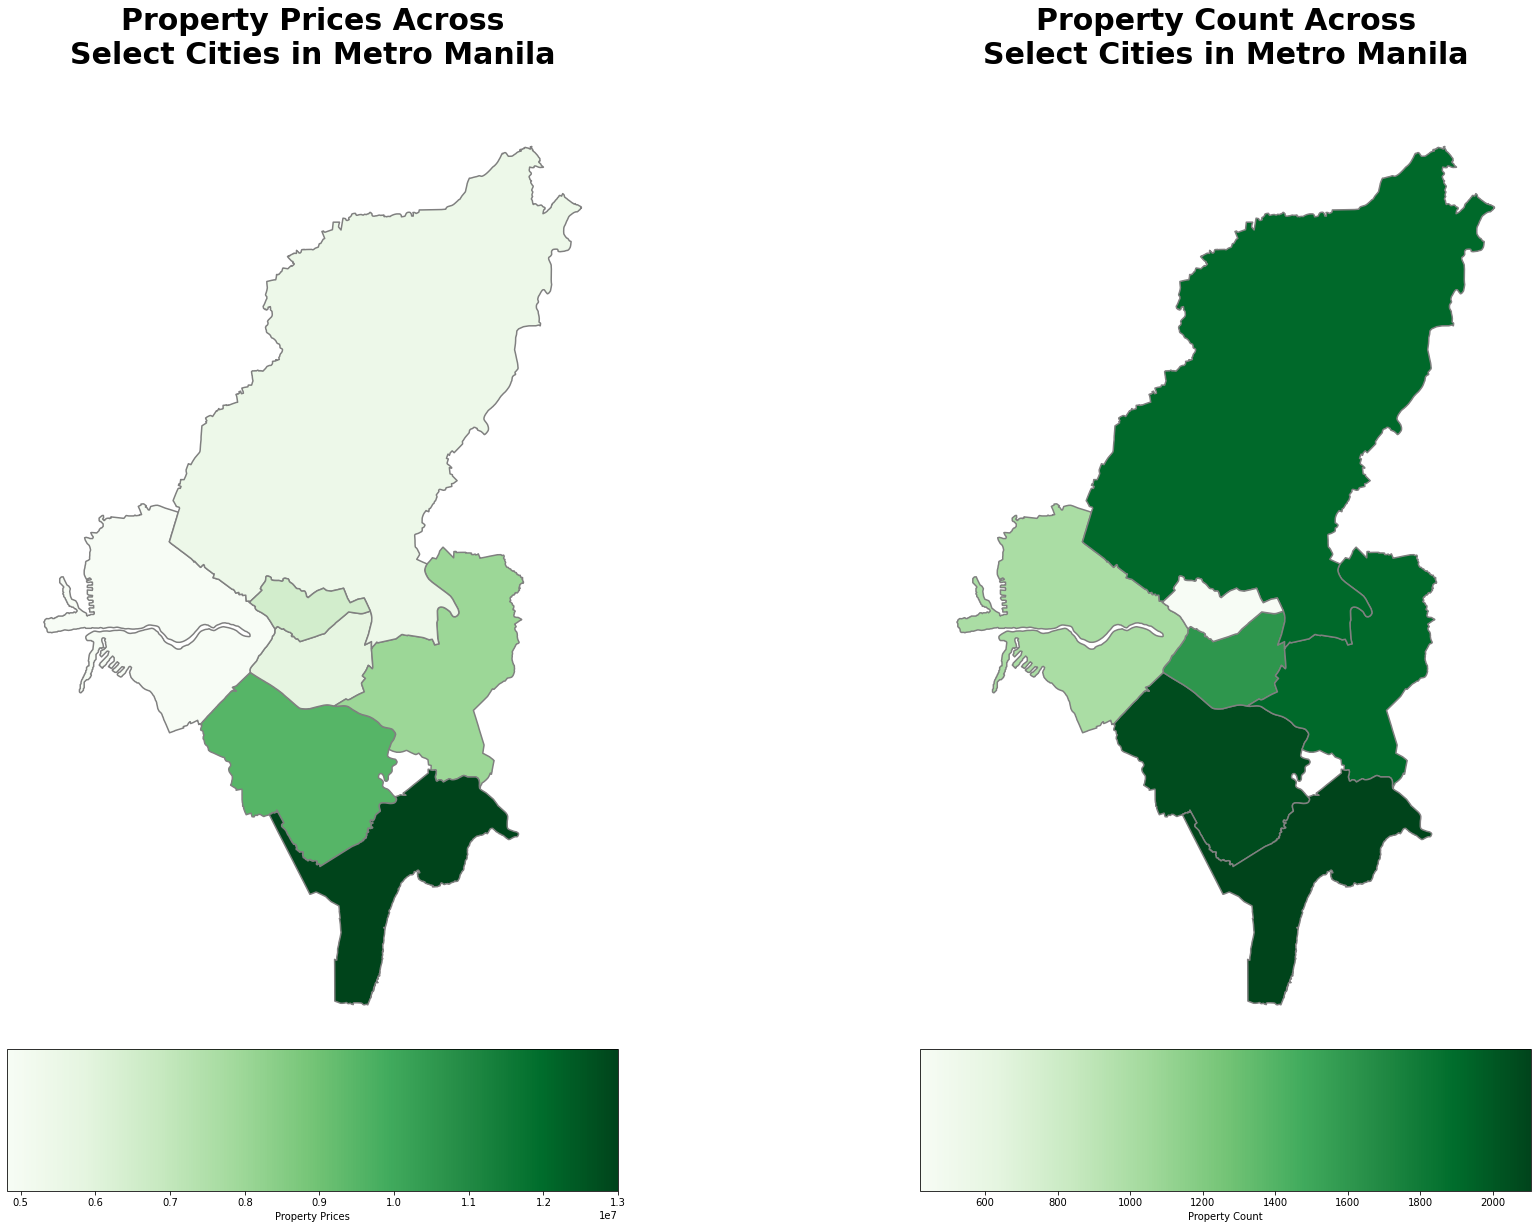

In [12]:
#  choropleth map of median price of property for sale in NCR
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(121) 

divider = make_axes_locatable(ax) 

cax = divider.append_axes("bottom", size="15%",pad=.02) 

map = ave_prop4sale_city.plot(column='price',legend=True,ax=ax,cmap='Greens',linewidth=1.5, edgecolor='.5', cax=cax,legend_kwds={'label': "Property Prices",'orientation': "horizontal"})

ax.set_title('Property Prices Across\nSelect Cities in Metro Manila',fontsize=30,fontdict={'fontweight':'bold'},pad=40)

ax.axis('off');

#  choropleth map of number of property for sale in NCR
ax = fig.add_subplot(122) 

divider = make_axes_locatable(ax) 

cax = divider.append_axes("bottom", size="15%",pad=.02) 

map = count_prop4sale_city.plot(column='listing',legend=True,ax=ax,cmap='Greens',linewidth=1.5, edgecolor='.5', cax=cax,legend_kwds={'label': "Property Count",'orientation': "horizontal"})

ax.set_title('Property Count Across\nSelect Cities in Metro Manila',fontsize=30,fontdict={'fontweight':'bold'},pad=40)

ax.axis('off');

<h2>Property for Rent</h2>

In [13]:
#  median price of property for rent in NCR
ave_prop4rent_city = prop4rent.groupby(by='city')['price'].median().reset_index()
ave_prop4rent_city = ncr_geodata.merge(ave_prop4rent_city, on='city', how='inner')
display(ave_prop4rent_city)

#  number of properties for rint in NCR
count_prop4rent_city = prop4rent.groupby(by='city')['listing'].count().reset_index()
count_prop4rent_city = ncr_geodata.merge(count_prop4rent_city, on='city', how='inner')
display(count_prop4rent_city)

city                                           geometry      price
0       makati  POLYGON ((121.02175 14.57696, 121.02316 14.576... 42,000.000
1  mandaluyong  POLYGON ((121.05737 14.60128, 121.05743 14.601... 25,000.000
2       manila  POLYGON ((120.97886 14.63668, 120.97897 14.636... 18,000.000
3        pasig  POLYGON ((121.08372 14.62282, 121.08645 14.620... 30,000.000
4       quezon  POLYGON ((121.11408 14.75949, 121.11430 14.759... 21,000.000
5     san juan  POLYGON ((121.02362 14.61240, 121.02409 14.612... 38,000.000
6       taguig  POLYGON ((121.07886 14.54775, 121.07909 14.547... 55,000.000

city                                           geometry  listing
0       makati  POLYGON ((121.02175 14.57696, 121.02316 14.576...     2477
1  mandaluyong  POLYGON ((121.05737 14.60128, 121.05743 14.601...     1283
2       manila  POLYGON ((120.97886 14.63668, 120.97897 14.636...      825
3        pasig  POLYGON ((121.08372 14.62282, 121.08645 14.620...     1147
4       quezon  POLYGON ((121.11408 14.75949, 121.11430 14.759...      782
5     san juan  POLYGON ((121.02362 14.61240, 121.02409 14.612...      144
6       taguig  POLYGON ((121.07886 14.54775, 121.07909 14.547...     2318

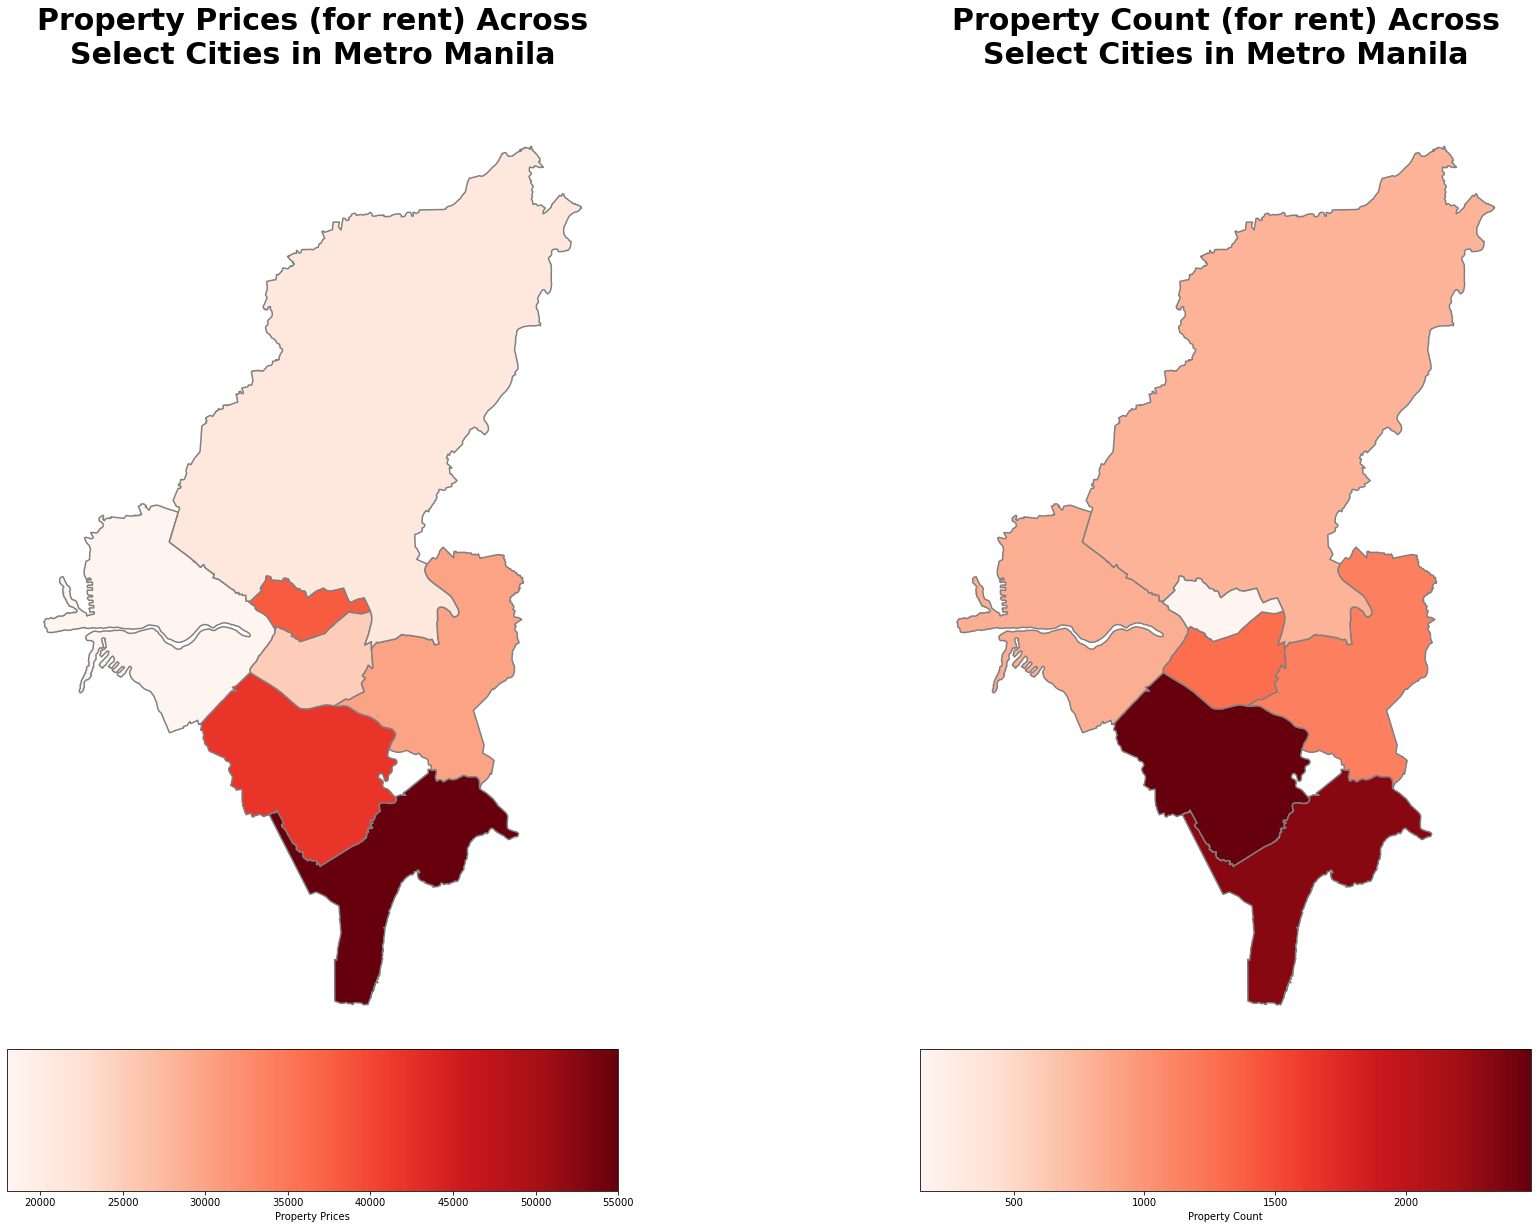

In [14]:
#  choropleth map of median price of property for rent in NCR
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(121) 

divider = make_axes_locatable(ax) 

cax = divider.append_axes("bottom", size="15%",pad=.02) 

map = ave_prop4rent_city.plot(column='price',legend=True,ax=ax,cmap='Reds',linewidth=1.5, edgecolor='.5', cax=cax,legend_kwds={'label': "Property Prices",'orientation': "horizontal"})

ax.set_title('Property Prices (for rent) Across\nSelect Cities in Metro Manila',fontsize=30,fontdict={'fontweight':'bold'},pad=40)

ax.axis('off');


#  choropleth map of number of property for rent in NCR
ax = fig.add_subplot(122) 

divider = make_axes_locatable(ax) 

cax = divider.append_axes("bottom", size="15%",pad=.02) 

map = count_prop4rent_city.plot(column='listing',legend=True,ax=ax,cmap='Reds',linewidth=1.5, edgecolor='.5', cax=cax,legend_kwds={'label': "Property Count",'orientation': "horizontal"})

ax.set_title('Property Count (for rent) Across\nSelect Cities in Metro Manila',fontsize=30,fontdict={'fontweight':'bold'},pad=40)

ax.axis('off');

<h2>Jobs</h2>

In [15]:
#  median salary for jobs in NCR
ave_jobs_city = jobs.groupby(by='city')['salary'].median().reset_index()
ave_jobs_city = ncr_geodata.merge(ave_jobs_city, on='city', how='inner')
ave_jobs_city = ave_jobs_city.set_index('city')
display(ave_jobs_city)

#  number of properties for rint in NCR
count_jobs_city = jobs.groupby(by='city')['listing'].count().reset_index()
count_jobs_city = ncr_geodata.merge(count_jobs_city, on='city', how='inner')
display(count_jobs_city)

geometry     salary
city                                                                     
makati       POLYGON ((121.02175 14.57696, 121.02316 14.576... 22,500.000
mandaluyong  POLYGON ((121.05737 14.60128, 121.05743 14.601... 20,644.000
manila       POLYGON ((120.97886 14.63668, 120.97897 14.636... 25,750.000
pasig        POLYGON ((121.08372 14.62282, 121.08645 14.620... 24,000.000
quezon       POLYGON ((121.11408 14.75949, 121.11430 14.759... 22,500.000
san juan     POLYGON ((121.02362 14.61240, 121.02409 14.612... 19,000.000
taguig       POLYGON ((121.07886 14.54775, 121.07909 14.547... 24,000.000

city                                           geometry  listing
0       makati  POLYGON ((121.02175 14.57696, 121.02316 14.576...      796
1  mandaluyong  POLYGON ((121.05737 14.60128, 121.05743 14.601...      516
2       manila  POLYGON ((120.97886 14.63668, 120.97897 14.636...      702
3        pasig  POLYGON ((121.08372 14.62282, 121.08645 14.620...      817
4       quezon  POLYGON ((121.11408 14.75949, 121.11430 14.759...      677
5     san juan  POLYGON ((121.02362 14.61240, 121.02409 14.612...      242
6       taguig  POLYGON ((121.07886 14.54775, 121.07909 14.547...      739

In [16]:
choro_map = px.choropleth_mapbox(ave_jobs_city, 
                                geojson=ave_jobs_city.geometry,
                                locations=ave_jobs_city.index, 
                                color='salary', 
                                center={'lat': 14.60886, 'lon': 121.037402},
                                mapbox_style='light',
                                zoom=9.75,
                                width=600,
                                height=570,
                                color_continuous_scale= px.colors.sequential.Greens)

choro_map.show()

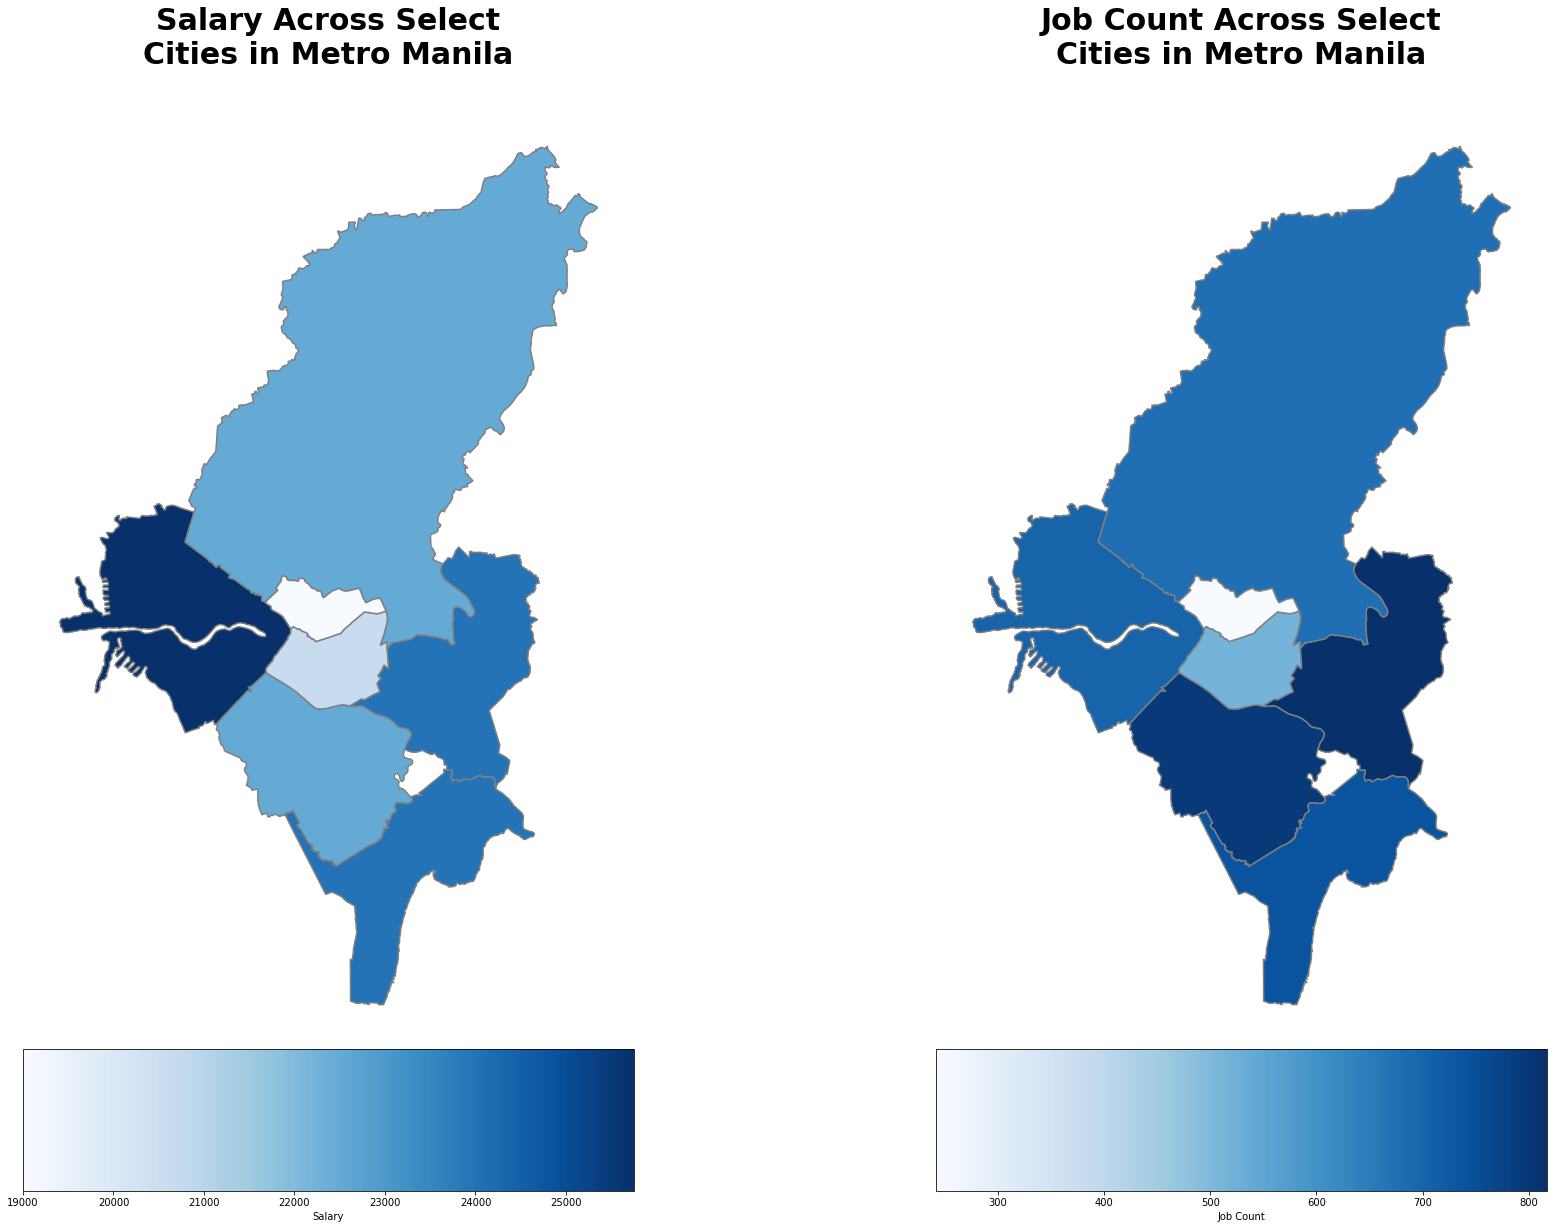

In [17]:
#  choropleth map of median price of salary for rent in NCR
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(121) 

divider = make_axes_locatable(ax) 

cax = divider.append_axes("bottom", size="15%",pad=.02) 

map = ave_jobs_city.plot(column='salary',legend=True,ax=ax,cmap='Blues',linewidth=1.5, edgecolor='.5', cax=cax,legend_kwds={'label': "Salary",'orientation': "horizontal"})

ax.set_title('Salary Across Select\nCities in Metro Manila',fontsize=30,fontdict={'fontweight':'bold'},pad=40)

ax.axis('off');


#  choropleth map of number of property for rent in NCR
ax = fig.add_subplot(122) 

divider = make_axes_locatable(ax) 

cax = divider.append_axes("bottom", size="15%",pad=.02) 

map = count_jobs_city.plot(column='listing',legend=True,ax=ax,cmap='Blues',linewidth=1.5, edgecolor='.5', cax=cax,legend_kwds={'label': "Job Count",'orientation': "horizontal"})

ax.set_title('Job Count Across Select\nCities in Metro Manila',fontsize=30,fontdict={'fontweight':'bold'},pad=40)

ax.axis('off');

<h1>Horizontal Bar</h1>

<h2>Property for Sale</h2>

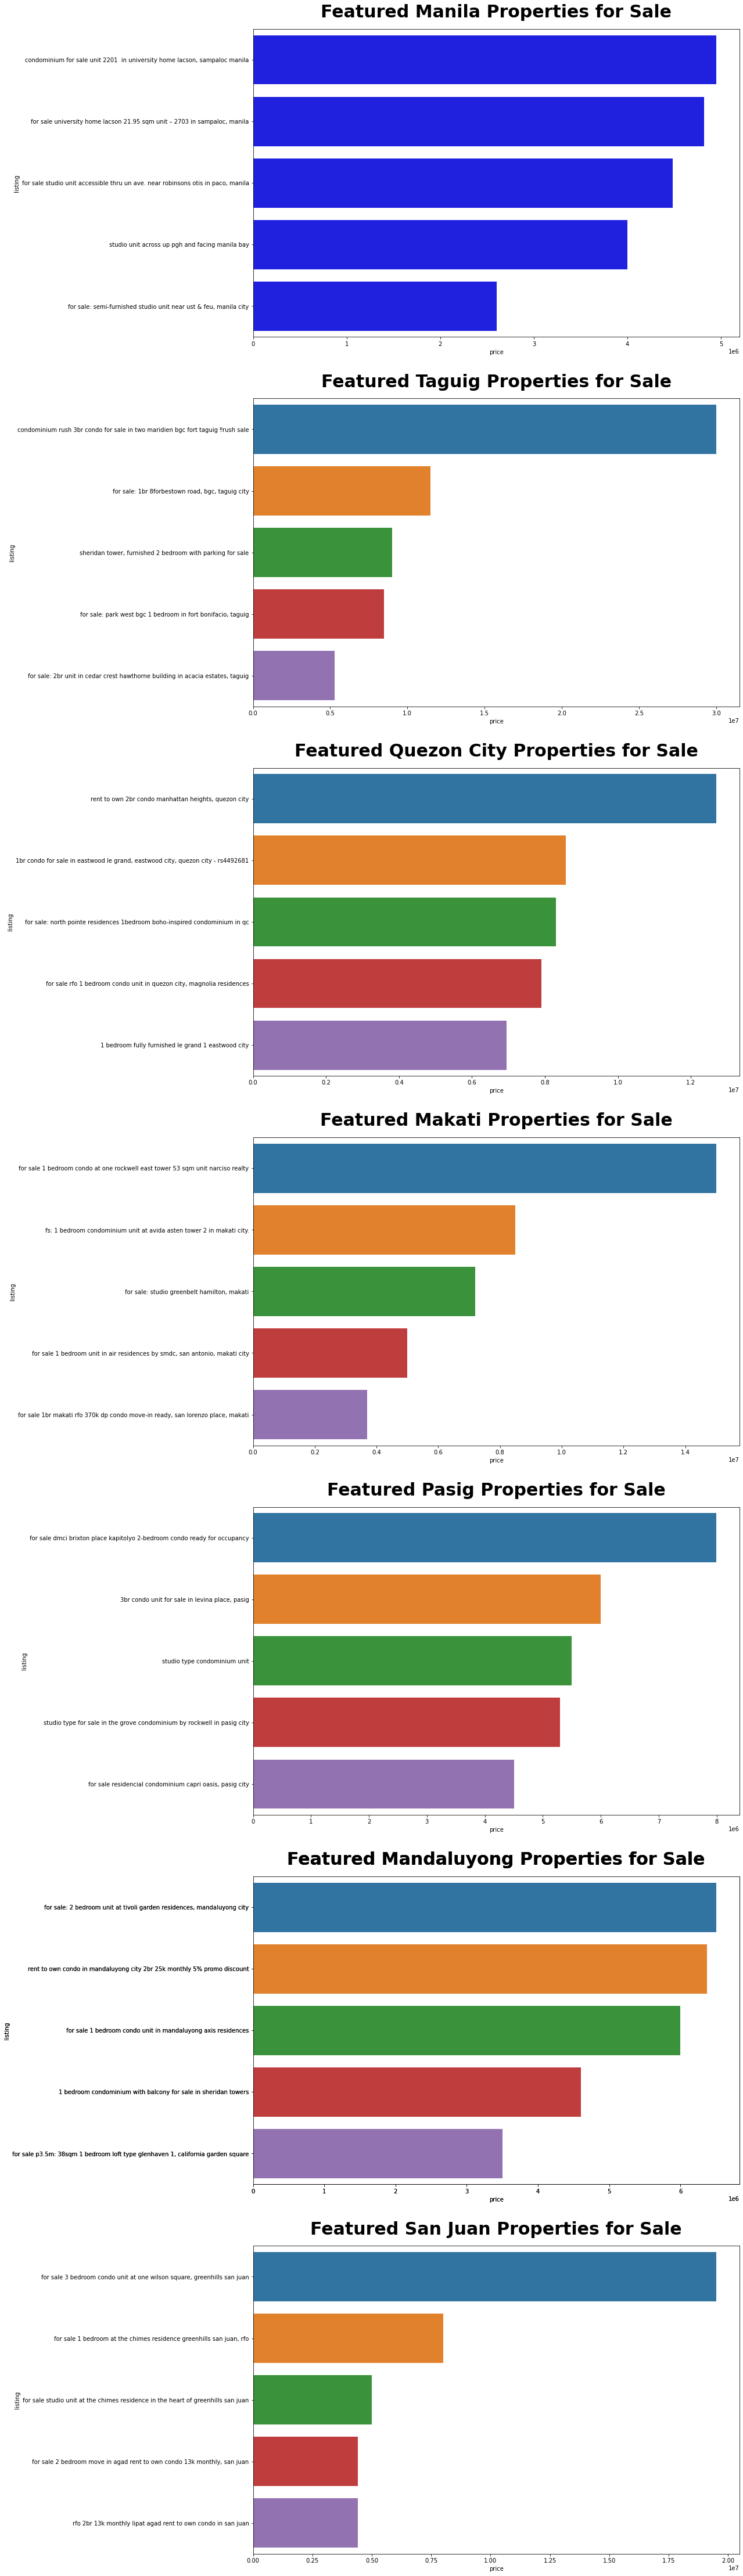

In [18]:
manila_sale = prop4sale.query("city == 'manila'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
taguig_sale = prop4sale.query("city == 'taguig'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
quezon_sale = prop4sale.query("city == 'quezon'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
makati_sale = prop4sale.query("city == 'makati'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
pasig_sale = prop4sale.query("city == 'pasig'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
mandaluyong_sale = prop4sale.query("city == 'mandaluyong'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
san_juan_sale = prop4sale.query("city == 'san juan'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)

fig = plt.figure(figsize=(15,80))

ax_manila = fig.add_subplot(711)
ax_manila = sns.barplot(x=manila_sale.price, y=manila_sale.listing, color='Blue')
ax_manila.set_title('Featured Manila Properties for Sale',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_taguig = fig.add_subplot(712)
ax_taguig = sns.barplot(x=taguig_sale.price, y=taguig_sale.listing)
ax_taguig.set_title('Featured Taguig Properties for Sale',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_quezon = fig.add_subplot(713)
ax_quezon = sns.barplot(x=quezon_sale.price, y=quezon_sale.listing)
ax_quezon.set_title('Featured Quezon City Properties for Sale',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_makati = fig.add_subplot(714)
ax_makati = sns.barplot(x=makati_sale.price, y=makati_sale.listing)
ax_makati.set_title('Featured Makati Properties for Sale',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_pasig = fig.add_subplot(715)
ax_pasig = sns.barplot(x=pasig_sale.price, y=pasig_sale.listing)
ax_pasig.set_title('Featured Pasig Properties for Sale',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_mandaluyong = fig.add_subplot(716)
ax_mandaluyong = sns.barplot(x=mandaluyong_sale.price, y=mandaluyong_sale.listing)
ax_mandaluyong.set_title('Featured Mandaluyong Properties for Sale',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_mandaluyong = fig.add_subplot(716)
ax_mandaluyong = sns.barplot(x=mandaluyong_sale.price, y=mandaluyong_sale.listing)
ax_mandaluyong.set_title('Featured Mandaluyong Properties for Sale',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_san_juan = fig.add_subplot(717)
ax_san_juan = sns.barplot(x=san_juan_sale.price, y=san_juan_sale.listing)
ax_san_juan.set_title('Featured San Juan Properties for Sale',fontsize=30,fontdict={'fontweight':'bold'},pad=20);

<h2>Property for rent</h2>

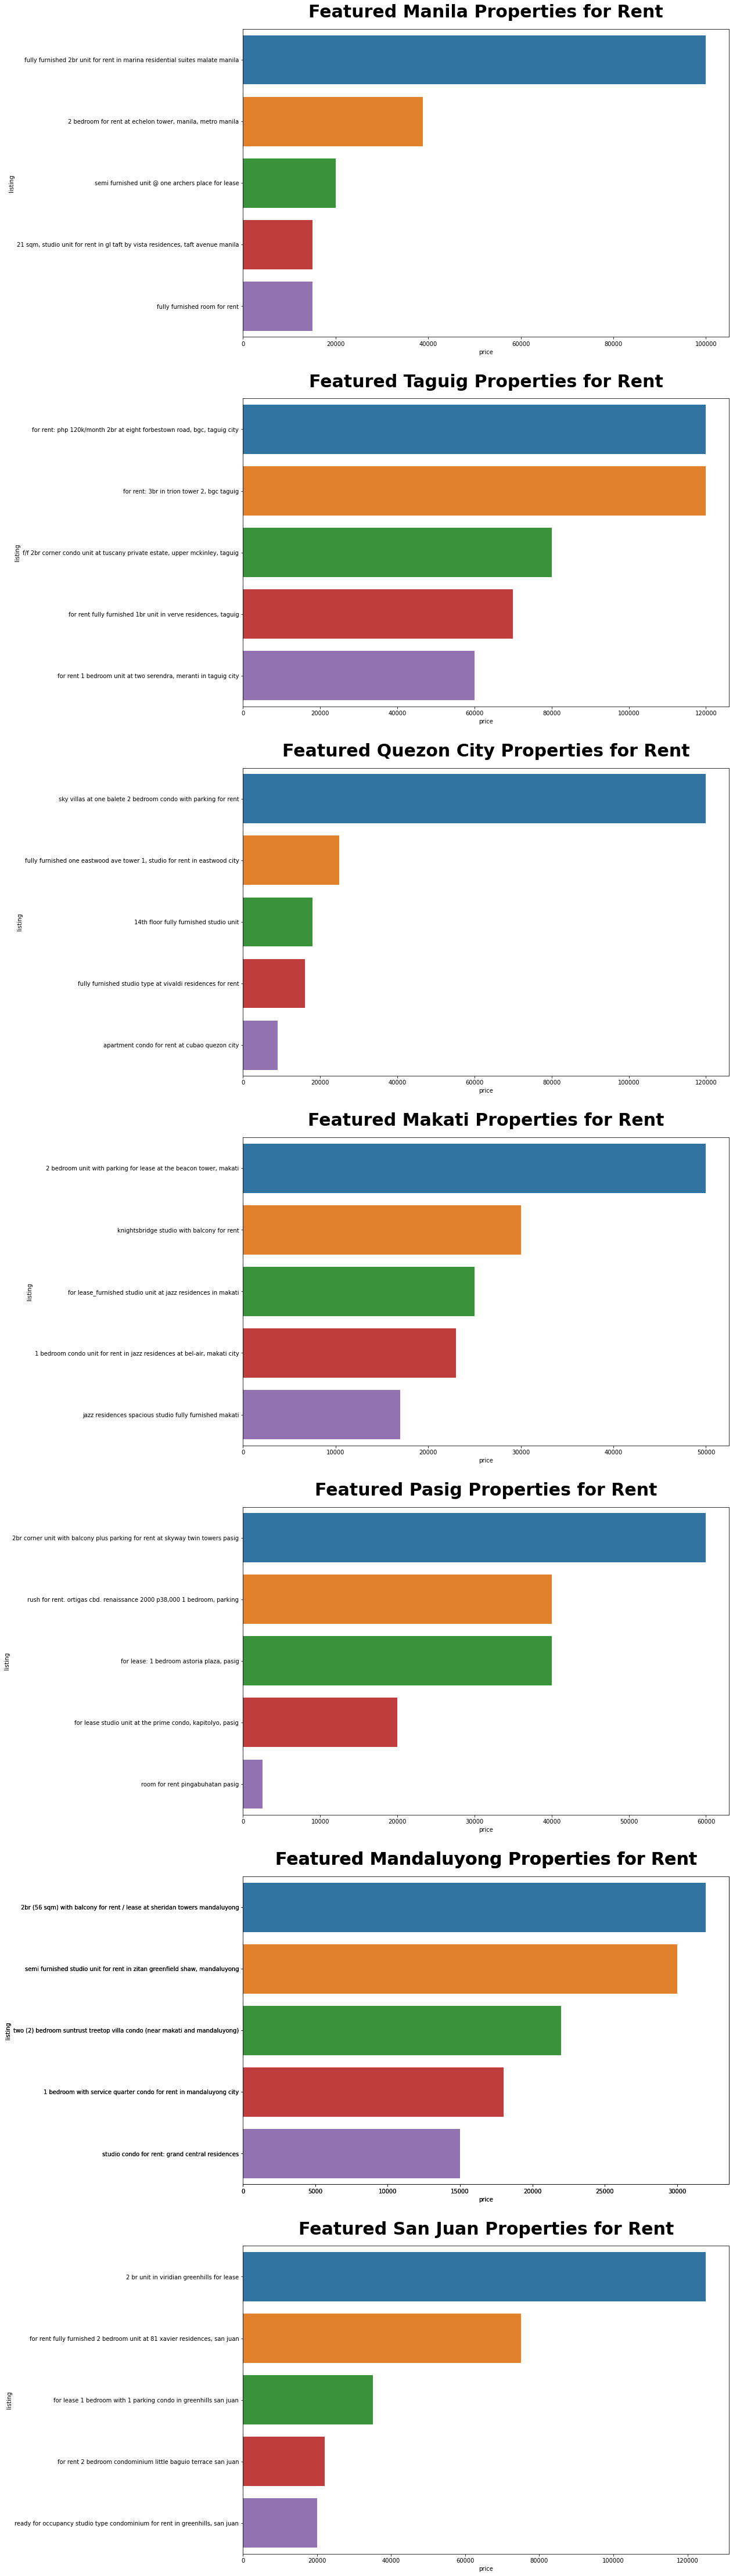

In [19]:
manila_rent = prop4rent.query("city == 'manila'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
taguig_rent = prop4rent.query("city == 'taguig'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
quezon_rent = prop4rent.query("city == 'quezon'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
makati_rent = prop4rent.query("city == 'makati'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
pasig_rent = prop4rent.query("city == 'pasig'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
mandaluyong_rent = prop4rent.query("city == 'mandaluyong'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)
san_juan_rent = prop4rent.query("city == 'san juan'").sample(5)[['listing','price']].reset_index(drop=True).sort_values(by='price', ascending=False)

fig = plt.figure(figsize=(15,80))

ax_manila = fig.add_subplot(711)
ax_manila = sns.barplot(x=manila_rent.price, y=manila_rent.listing)
ax_manila.set_title('Featured Manila Properties for Rent',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_taguig = fig.add_subplot(712)
ax_taguig = sns.barplot(x=taguig_rent.price, y=taguig_rent.listing)
ax_taguig.set_title('Featured Taguig Properties for Rent',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_quezon = fig.add_subplot(713)
ax_quezon = sns.barplot(x=quezon_rent.price, y=quezon_rent.listing)
ax_quezon.set_title('Featured Quezon City Properties for Rent',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_makati = fig.add_subplot(714)
ax_makati = sns.barplot(x=makati_rent.price, y=makati_rent.listing)
ax_makati.set_title('Featured Makati Properties for Rent',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_pasig = fig.add_subplot(715)
ax_pasig = sns.barplot(x=pasig_rent.price, y=pasig_rent.listing)
ax_pasig.set_title('Featured Pasig Properties for Rent',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_mandaluyong = fig.add_subplot(716)
ax_mandaluyong = sns.barplot(x=mandaluyong_rent.price, y=mandaluyong_rent.listing)
ax_mandaluyong.set_title('Featured Mandaluyong Properties for Rent',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_mandaluyong = fig.add_subplot(716)
ax_mandaluyong = sns.barplot(x=mandaluyong_rent.price, y=mandaluyong_rent.listing)
ax_mandaluyong.set_title('Featured Mandaluyong Properties for Rent',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_san_juan = fig.add_subplot(717)
ax_san_juan = sns.barplot(x=san_juan_rent.price, y=san_juan_rent.listing)
ax_san_juan.set_title('Featured San Juan Properties for Rent',fontsize=30,fontdict={'fontweight':'bold'},pad=20);

<h2>Jobs</h2>

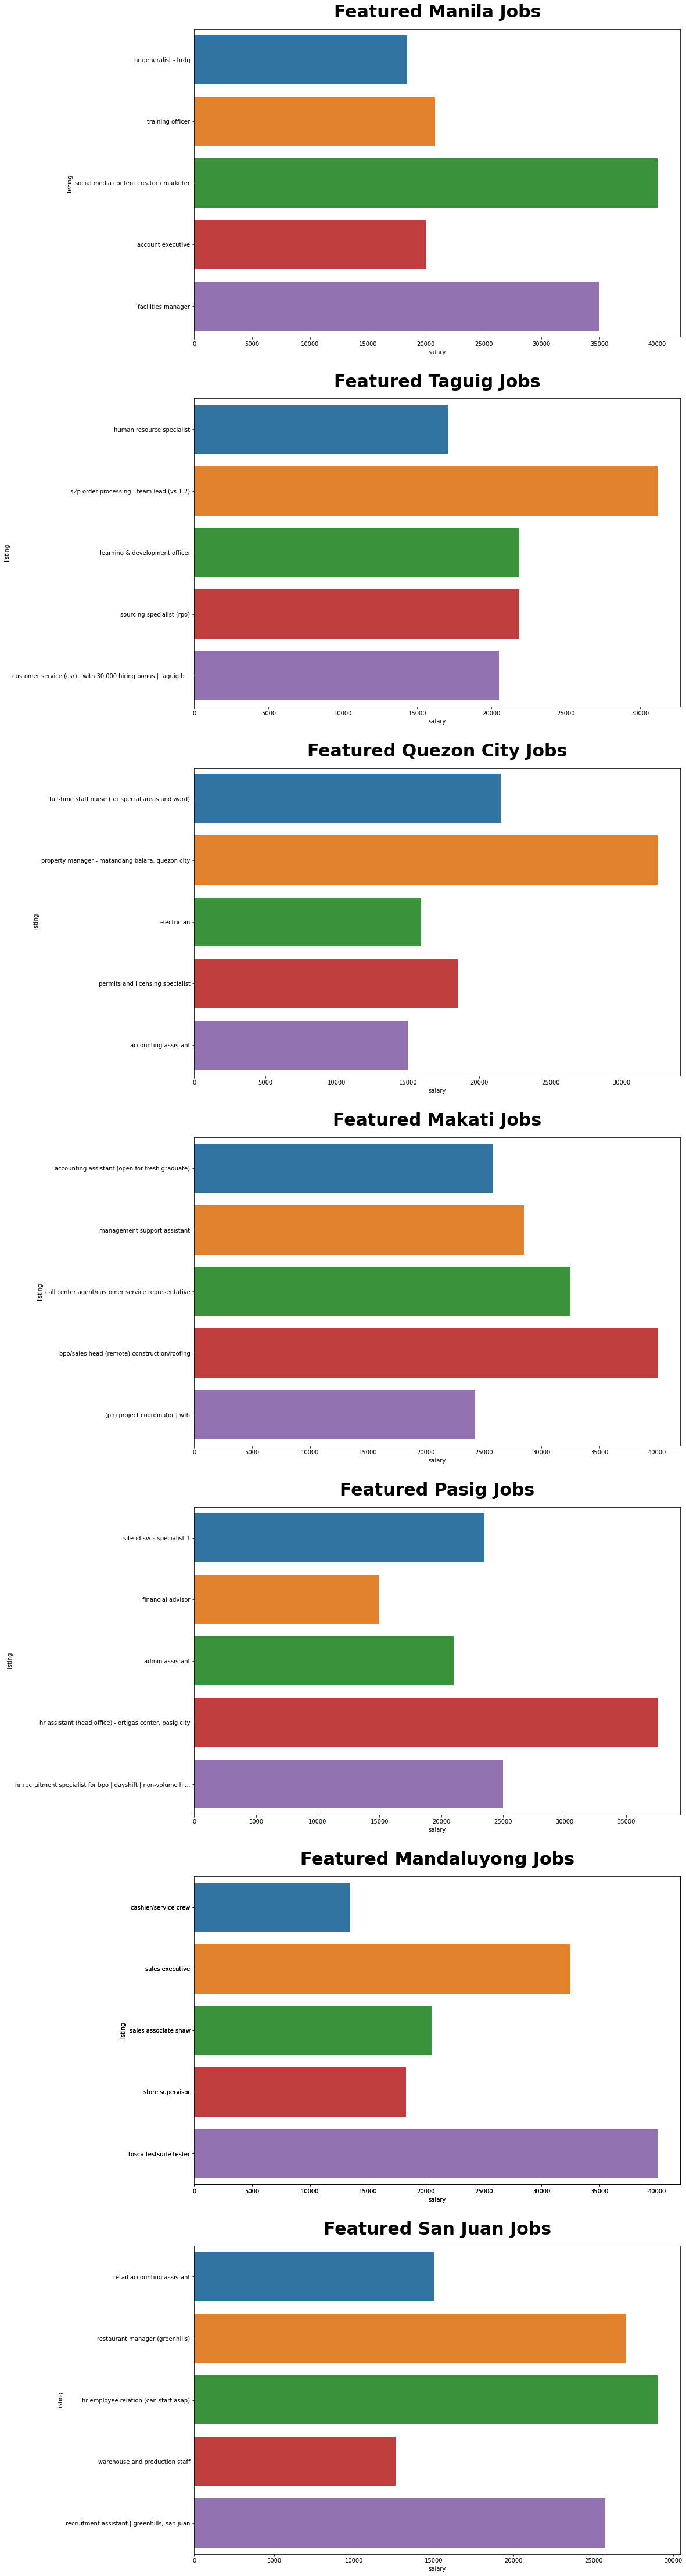

In [20]:
manila_jobs = jobs.query("city == 'manila'").sort_values(by='salary', ascending=False).sample(5)[['listing','salary']].reset_index(drop=True)
taguig_jobs = jobs.query("city == 'taguig'").sort_values(by='salary', ascending=False).sample(5)[['listing','salary']].reset_index(drop=True)
quezon_jobs = jobs.query("city == 'quezon'").sort_values(by='salary', ascending=False).sample(5)[['listing','salary']].reset_index(drop=True)
makati_jobs = jobs.query("city == 'makati'").sort_values(by='salary', ascending=False).sample(5)[['listing','salary']].reset_index(drop=True)
pasig_jobs = jobs.query("city == 'pasig'").sort_values(by='salary', ascending=False).sample(5)[['listing','salary']].reset_index(drop=True)
mandaluyong_jobs = jobs.query("city == 'mandaluyong'").sort_values(by='salary', ascending=False).sample(5)[['listing','salary']].reset_index(drop=True)
san_juan_jobs = jobs.query("city == 'san juan'").sort_values(by='salary', ascending=False).sample(5)[['listing','salary']].reset_index(drop=True)

fig = plt.figure(figsize=(15,80))

ax_manila = fig.add_subplot(711)
ax_manila = sns.barplot(x=manila_jobs.salary, y=manila_jobs.listing)
ax_manila.set_title('Featured Manila Jobs',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_taguig = fig.add_subplot(712)
ax_taguig = sns.barplot(x=taguig_jobs.salary, y=taguig_jobs.listing)
ax_taguig.set_title('Featured Taguig Jobs',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_quezon = fig.add_subplot(713)
ax_quezon = sns.barplot(x=quezon_jobs.salary, y=quezon_jobs.listing)
ax_quezon.set_title('Featured Quezon City Jobs',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_makati = fig.add_subplot(714)
ax_makati = sns.barplot(x=makati_jobs.salary, y=makati_jobs.listing)
ax_makati.set_title('Featured Makati Jobs',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_pasig = fig.add_subplot(715)
ax_pasig = sns.barplot(x=pasig_jobs.salary, y=pasig_jobs.listing)
ax_pasig.set_title('Featured Pasig Jobs',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_mandaluyong = fig.add_subplot(716)
ax_mandaluyong = sns.barplot(x=mandaluyong_jobs.salary, y=mandaluyong_jobs.listing)
ax_mandaluyong.set_title('Featured Mandaluyong Jobs',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_mandaluyong = fig.add_subplot(716)
ax_mandaluyong = sns.barplot(x=mandaluyong_jobs.salary, y=mandaluyong_jobs.listing)
ax_mandaluyong.set_title('Featured Mandaluyong Jobs',fontsize=30,fontdict={'fontweight':'bold'},pad=20)

ax_san_juan = fig.add_subplot(717)
ax_san_juan = sns.barplot(x=san_juan_jobs.salary, y=san_juan_jobs.listing)
ax_san_juan.set_title('Featured San Juan Jobs',fontsize=30,fontdict={'fontweight':'bold'},pad=20);

<h1>Scatter Map</h1>

<h2>Property for Sale</h2>

In [21]:
prop4sale_geo = prop4sale[~((prop4sale.latitude.gt(15)) | prop4sale.latitude.lt(14))]
prop4sale_geo

listing  \
0      1 bedroom condo unit for sale near dlsu|manila...   
1      studio w/ balcony for sale | c. m. recto ave, ...   
2      rfo studio condo unit beside dlsu taft|taft av...   
3      rfo studio condo unit fronting ust|espana, man...   
4      2 bedroom condo unit for sale near dlsu|manila...   
...                                                  ...   
11018            grass residences 1 bedroom amenity view   
11019  one castilla place | modern minimalist 3br con...   
11020  for sale condotel investment at seville reside...   
11021  for sale: 1br unit in vinia residences, quezon...   
11022  for sale 1 bedroom ready for occupancy condo i...   

                        location          price  bedroom_num  bathroom_num  \
0                 malate, manila  4,725,000.000        1.000         1.000   
1                 quiapo, manila  6,216,696.000        1.000         1.000   
2                   taft, manila  3,500,000.000        1.000         1.000   
3               sampaloc, manila  5,366,800.000        1.000         1.000   
4                 malate, manila  5,252,679.000        2.000         2.000   
...                          ...            ...          ...           ...   
11018  santo cristo, quezon city  5,000,000.000        1.000         1.000   
11019      valencia, quezon city 12,500,000.000        3.000         3.000   
11020    bagumbayan, quezon city  9,772,500.000        1.000         1.000   
11021       phil-am, quezon city  4,650,000.000        1.000         1.000   
11022     balingasa, quezon city  3,814,000.000        1.000         1.000   

       floor_area  longitude  latitude    city  
0          31.000    120.992    14.570  manila  
1          26.000    120.983    14.600  manila  
2          18.000    120.995    14.563  manila  
3          23.000    120.996    14.611  manila  
4          35.000    120.994    14.562  manila  
...           ...        ...       ...     ...  
11018      37.000    121.028    14.660  quezon  
11019      81.000    121.035    14.611  quezon  
11020      51.000    121.089    14.603  quezon  
11021      34.000    121.033    14.651  quezon  
11022      29.000    120.998    14.655  quezon  

[11023 rows x 9 columns]

In [22]:
px.set_mapbox_access_token('pk.eyJ1IjoicnVpemxvcmVuem9jaGF2ZXoiLCJhIjoiY2wzZHp5MTNlMDM4aDNmbzN5bjhva29ueiJ9.sKJbYBhB5MwOdBqvplljWw')
fig = px.scatter_mapbox(prop4sale_geo, lat="latitude", lon="longitude", hover_name="listing", color='city', size='price', width=1000, height=1500)
fig.show()

<h2>Property for Rent</h2>

In [23]:
px.set_mapbox_access_token('pk.eyJ1IjoicnVpemxvcmVuem9jaGF2ZXoiLCJhIjoiY2wzZHp5MTNlMDM4aDNmbzN5bjhva29ueiJ9.sKJbYBhB5MwOdBqvplljWw')
fig = px.scatter_mapbox(prop4rent, lat="latitude", lon="longitude", hover_name="listing", color='city', size='price', width=1000, height=1500)
fig.show()

<h1>Bar chart</h1>

In [42]:
city_dist = schools.city.value_counts().reset_index()
city_dist = city_dist.rename(columns={'index': 'city', 'city': 'count'})
city_dist.min()

city     makati
count        41
dtype: object

In [40]:
schools

city                                        school_name   sector  \
0     san juan                              pedro cruz elementary   public   
1     san juan                                         salapan es   public   
2     san juan                                        san juan es   public   
3     san juan                                    san perfecto es   public   
4     san juan                      san juan national high school   public   
...        ...                                                ...      ...   
2939    taguig                               sep christian school  private   
2940    taguig  huckleberry montessori school, inc. pateros (m...  private   
2941    taguig  maranatha christian academy of tabacalera pate...  private   
2942    taguig           abc educational development center, inc.  private   
2943    taguig  affordable private education center, inc. (ape...  private   

     school_subclass curricular_class  
0      deped managed        purely es  
1      deped managed        purely es  
2      deped managed        purely es  
3      deped managed        purely es  
4      deped managed     jhs with shs  
...              ...              ...  
2939   non-sectarian        purely es  
2940   non-sectarian        purely es  
2941   non-sectarian        purely es  
2942   non-sectarian        purely es  
2943   non-sectarian     jhs with shs  

[1783 rows x 5 columns]

Text(0.5, 1.0, 'Distribution of Schools Across Select Metro Manila Cities')

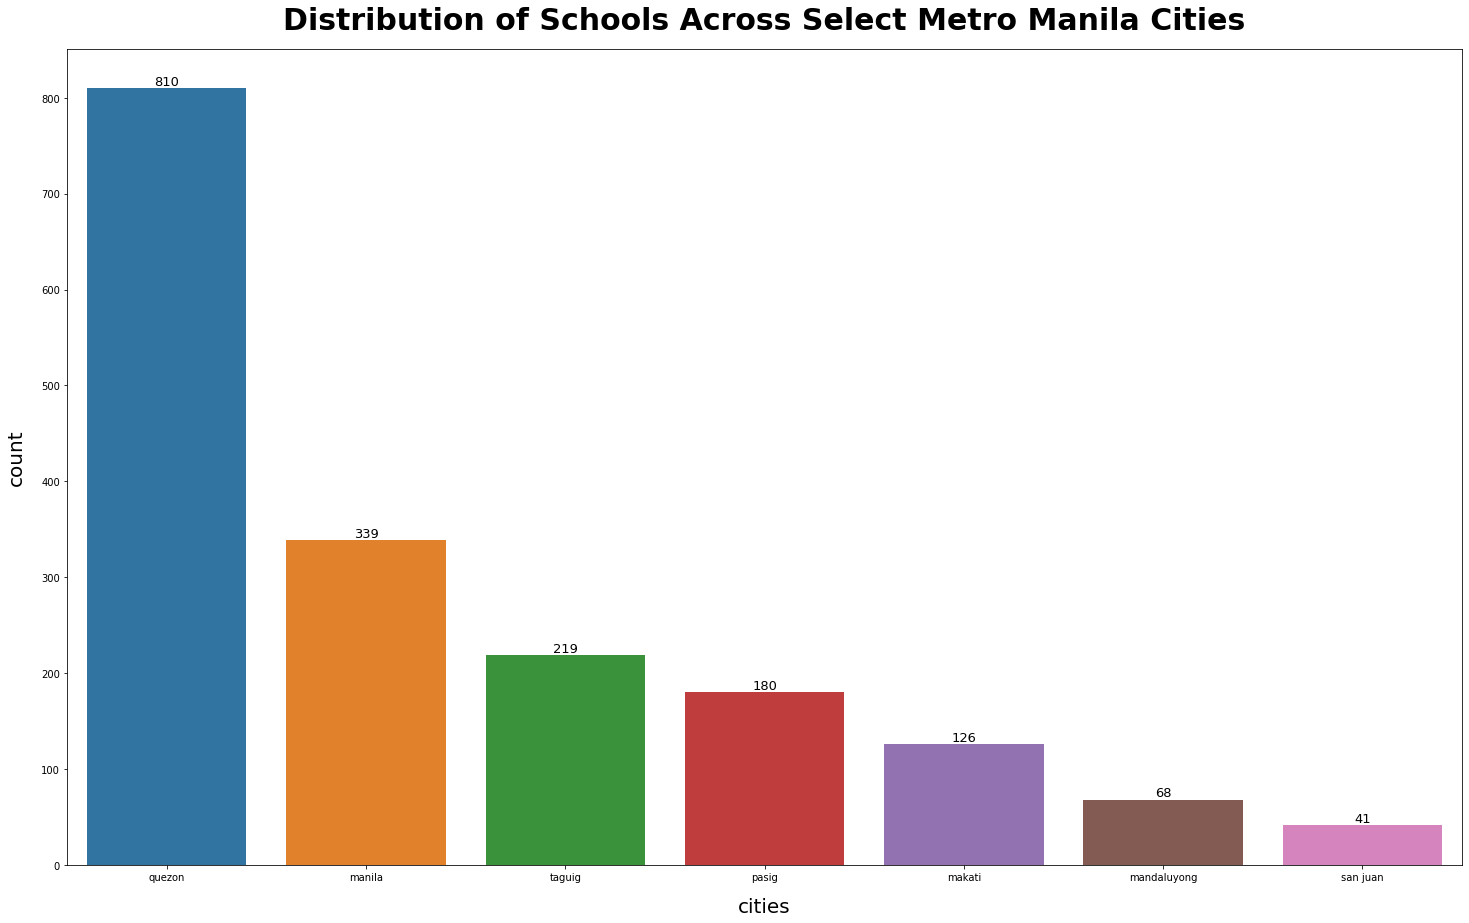

In [25]:
fig = plt.figure(figsize=(25,15))

ax = sns.barplot(x=city_dist.index,y=city_dist.values)
ax.set_xlabel('cities', size=20, labelpad=15)
ax.set_ylabel('count', size=20, labelpad=15)
ax.bar_label(ax.containers[0], size=13);
ax.set_title('Distribution of Schools Across Select Metro Manila Cities', size=30, fontdict={'fontweight':'bold'}, pad=20)

<h1>Treemap</h1>

In [26]:
fig1 = px.treemap(schools, path=['sector','curricular_class'], width=800, height=400, color='curricular_class')
fig1.show()

In [27]:
def school_city(city):
    by_city = schools.query(f"city == '{city}'")
    return by_city

In [28]:
fig1 = px.treemap(school_city('manila'), path=['sector','curricular_class'], width=800, height=400, color='curricular_class')
fig1.show()

In [29]:
fig = px.treemap(school_city('makati'), path=['sector','curricular_class'], width=800, height=400, color='curricular_class')
fig.show()

In [30]:
fig = px.treemap(school_city('pasig'), path=['sector','curricular_class'], width=800, height=400, color='curricular_class')
fig.show()

In [31]:
fig = px.treemap(school_city('taguig'), path=['sector','curricular_class'], width=800, height=400, color='curricular_class')
fig.show()

In [32]:
fig = px.treemap(school_city('quezon'), path=['sector','curricular_class'], width=800, height=400, color='curricular_class')
fig.show()

In [33]:
fig = px.treemap(school_city('mandaluyong'), path=['sector','curricular_class'], width=800, height=400, color='curricular_class')
fig.show()

In [34]:
fig = px.treemap(school_city('san juan'), path=['sector','curricular_class'], width=800, height=400, color='curricular_class')
fig.show()